In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

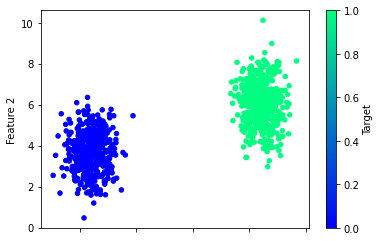

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 968us/step - loss: 0.7098 - accuracy: 0.1733
Epoch 2/100
24/24 [==============================] - 0s 824us/step - loss: 0.7018 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 840us/step - loss: 0.6948 - accuracy: 0.2760
Epoch 4/100
24/24 [==============================] - 0s 842us/step - loss: 0.6884 - accuracy: 0.5067
Epoch 5/100
24/24 [==============================] - 0s 965us/step - loss: 0.6817 - accuracy: 0.5067
Epoch 6/100
24/24 [==============================] - 0s 964us/step - loss: 0.6739 - accuracy: 0.5067
Epoch 7/100
24/24 [==============================] - 0s 881us/step - loss: 0.6647 - accuracy: 0.5067
Epoch 8/100
24/24 [==============================] - 0s 787us/step - loss: 0.6539 - accuracy: 0.5067
Epoch 9/100
24/24 [==============================] - 0s 776us/step - loss: 0.6418 - accuracy: 0.6080
Epoch 10/100
24/24 [==============================] - 0s 847us/step - loss: 0.6283 - ac

24/24 [==============================] - 0s 769us/step - loss: 0.1086 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 779us/step - loss: 0.1068 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 782us/step - loss: 0.1049 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 772us/step - loss: 0.1032 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 760us/step - loss: 0.1014 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 747us/step - loss: 0.0997 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 822us/step - loss: 0.0981 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 803us/step - loss: 0.0964 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 758us/step - loss: 0.0948 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 721us/step - loss: 0.0933 - accuracy: 

<AxesSubplot:>

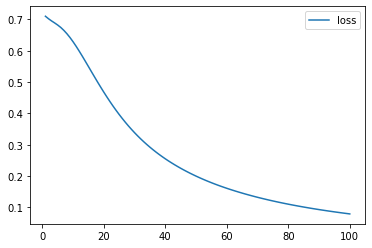

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

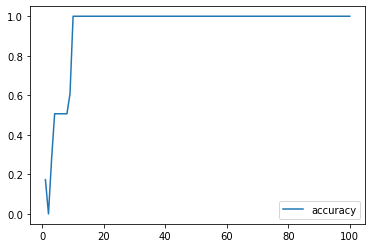

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0804 - accuracy: 1.0000
Loss: 0.0803593173623085, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

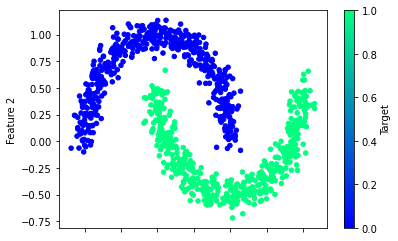

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1342 - accuracy: 0.4493
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0338 - accuracy: 0.4600
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9603 - accuracy: 0.4760
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9114 - accuracy: 0.4827
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8747 - accuracy: 0.4880
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8443 - accuracy: 0.4987
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8203 - accuracy: 0.5067
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7992 - accuracy: 0.5107
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7808 - accuracy: 0.5173
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7645 - accuracy: 0.5240
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.7987
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3904 - accuracy: 0.8027
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8027
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8053
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8067
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8093
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8107
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8120
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8133
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.8173
Epoch 93/100


<AxesSubplot:>

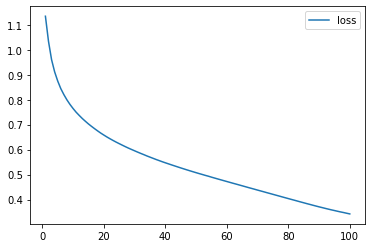

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

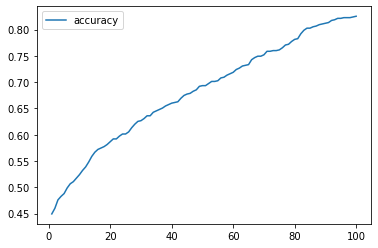

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 954us/step - loss: 0.5440 - accuracy: 0.8093
Epoch 2/100
24/24 [==============================] - 0s 930us/step - loss: 0.5062 - accuracy: 0.8253
Epoch 3/100
24/24 [==============================] - 0s 912us/step - loss: 0.4739 - accuracy: 0.8347
Epoch 4/100
24/24 [==============================] - 0s 867us/step - loss: 0.4467 - accuracy: 0.8400
Epoch 5/100
24/24 [==============================] - 0s 890us/step - loss: 0.4225 - accuracy: 0.8520
Epoch 6/100
24/24 [==============================] - 0s 959us/step - loss: 0.4017 - accuracy: 0.8613
Epoch 7/100
24/24 [==============================] - 0s 850us/step - loss: 0.3835 - accuracy: 0.8680
Epoch 8/100
24/24 [==============================] - 0s 853us/step - loss: 0.3673 - accuracy: 0.8760
Epoch 9/100
24/24 [==============================] - 0s 886us/step - loss: 0.3530 - accuracy: 0.8800
Epoch 10/100
24/24 [==============================] - 0s 911us/step - loss: 0.3404 - accura

24/24 [==============================] - 0s 824us/step - loss: 0.1848 - accuracy: 0.9173
Epoch 82/100
24/24 [==============================] - 0s 867us/step - loss: 0.1837 - accuracy: 0.9173
Epoch 83/100
24/24 [==============================] - 0s 812us/step - loss: 0.1824 - accuracy: 0.9200
Epoch 84/100
24/24 [==============================] - 0s 867us/step - loss: 0.1813 - accuracy: 0.9213
Epoch 85/100
24/24 [==============================] - 0s 867us/step - loss: 0.1800 - accuracy: 0.9200
Epoch 86/100
24/24 [==============================] - 0s 811us/step - loss: 0.1788 - accuracy: 0.9227
Epoch 87/100
24/24 [==============================] - 0s 891us/step - loss: 0.1775 - accuracy: 0.9240
Epoch 88/100
24/24 [==============================] - 0s 867us/step - loss: 0.1764 - accuracy: 0.9267
Epoch 89/100
24/24 [==============================] - 0s 843us/step - loss: 0.1751 - accuracy: 0.9267
Epoch 90/100
24/24 [==============================] - 0s 824us/step - loss: 0.1740 - accuracy: 